In [1]:
# 移除不必要的警告
import warnings
warnings.filterwarnings('ignore')

import pickle
import pyfolio as pf
import pandas as pd

from finlab.data import Data

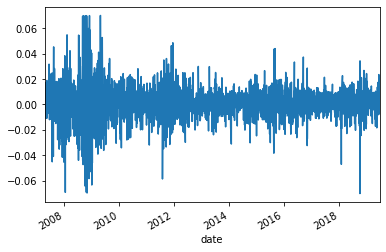

In [2]:
# 獲取0050收盤價資料
data = Data()
close = data.get_adj("收盤價")

# 將收盤假日期調整，這樣子等等使用pyfolio才不會有問題
close.index = close.index.tz_localize("Asia/Taipei")

# 每天報酬率繪圖
%matplotlib inline
close['0050'].pct_change().plot()

Start date,2007-04-23
End date,2019-06-28
Total months,143
,Backtest
Annual return,6.4%
Cumulative returns,111.0%
Annual volatility,20.1%
Sharpe ratio,0.41
Calmar ratio,0.12
Stability,0.79
Max drawdown,-55.8%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,55.75,2007-10-29,2008-11-20,2011-01-28,850
1,23.01,2011-01-28,2011-12-19,2013-05-16,600
2,20.96,2015-04-27,2015-08-24,2016-08-08,336
3,17.53,2018-08-30,2019-01-04,NaT,NaN
4,14.55,2007-07-25,2007-08-16,2007-10-02,50


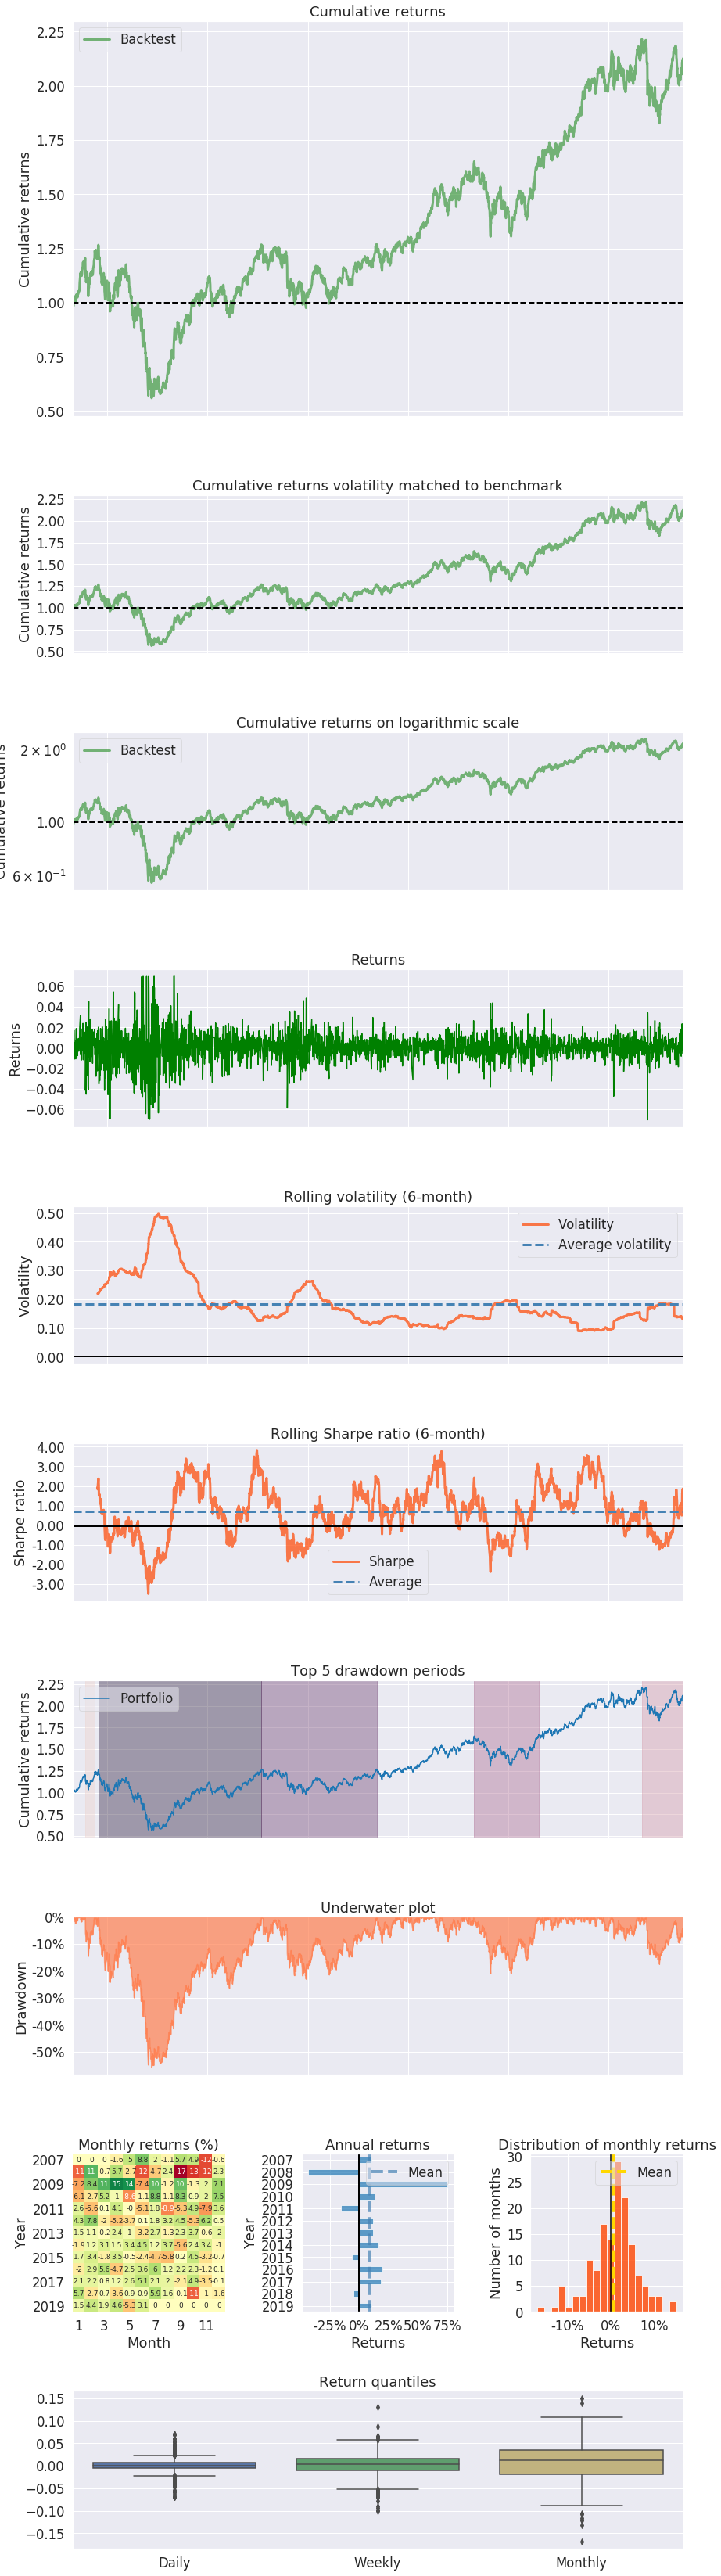

In [3]:
pf.create_returns_tear_sheet(close['0050'].pct_change())

In [ ]:
# 得到 上一個單元的 回測結果
ret = pickle.load(open("return_history.pkl", "rb"))

# 將回測報酬率取出來
ret = ret.pct_change().dropna()
ret.index = pd.to_datetime(ret.index).tz_localize('Asia/Taipei')

# 利用pyfolio 比較報酬率
pf.create_returns_tear_sheet(ret, benchmark_rets=close['0050'].pct_change())